# Foundations of Data Science - CMU Portugal Academy

> In this class, we will focus on visualizing data using various libraries such as matplotlib, seaborn and plotly. 
> 
> Instructors:
>   - David Semedo (df.semedo@fct.unl.pt)
>   - Rafael Ferreira (rah.ferreira@campus.fct.unl.pt)

## Import the Necessary Libraries 

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.linear_model import LogisticRegression as LogReg

## Loading the Dataset

**Origin:** 

The dataset was introduced by the British biologist and statistician Ronald A. Fisher in 1936 as part of his paper on discriminant analysis.

**Structure:** 

The dataset contains 150 samples of iris flowers, with each sample belonging to one of three species:
- Iris setosa
- Iris versicolor
- Iris virginica

**Features:** 

Each sample has four features (attributes) measured in centimeters:
1. Sepal Length: Length of the sepal
2. Sepal Width: Width of the sepal
3. Petal Length: Length of the petal
4. Petal Width: Width of the petal

**Target Variable:** 

The target variable is the species of the iris flower, represented as integer labels (0, 1, 2) corresponding to the three species.

In [49]:
# Load the iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train, Validation and Test Splits
Splitting the dataset into training, validation, and test sets to evaluate model performance properly.

In [51]:
# original dataset
print("Original dataset")
print("Input Features:", X.shape)
print("Target Features:", y.shape)
print()

# 1. Train, Validation, and Test Split
# First, we split the data into a training set and a temporary set (which will be further split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
print("Training set:", X_train.shape, y_train.shape)
print("Temporary set:", X_temp.shape, y_temp.shape)
print()

# Now, split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)
print()

Original dataset
Input Features: (150, 4)
Target Features: (150,)

Training set: (90, 4) (90,)
Temporary set: (60, 4) (60,)

Training set: (90, 4) (90,)
Validation set: (30, 4) (30,)
Test set: (30, 4) (30,)



## Cross Validation
Using KFold cross-validation iterator to split the dataset and train the model on each fold.

In [52]:
kf = KFold(n_splits=5, shuffle=False)  # here we turn off shuffling to better understand the splits

f_count = 0
print("KFold splits:")
for train_index, val_index in kf.split(X_train):
    
    X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    f_count += 1

    print("Fold:", f_count)
    print("Validation Fold:", X_val_fold.shape, y_val_fold.shape)
    print("Validation Fold Index:", val_index)
    print("Train Fold:", X_train_fold.shape, y_train_fold.shape)
    print("Train Fold Index:", train_index)
    print()

KFold splits:
Fold: 1
Validation Fold: (18, 4) (18,)
Validation Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Train Fold: (72, 4) (72,)
Train Fold Index: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]

Fold: 2
Validation Fold: (18, 4) (18,)
Validation Fold Index: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Train Fold: (72, 4) (72,)
Train Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]

Fold: 3
Validation Fold: (18, 4) (18,)
Validation Fold Index: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53]
Train Fold: (72, 4) (72,)
Train Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 

If we want to keep same class distribution in the splits as in the complete dataset use ``StratifiedKFold``

In [53]:
# for a stratified KFold
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)  # here we turn off shuffling to better understand the splits

f_count = 0
print("Stratified KFold splits:")
for train_index, val_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    f_count += 1

    print("Fold:", f_count)
    print("Validation Fold:", X_val_fold.shape, y_val_fold.shape)
    print("Validation Fold Index:", val_index)
    print("Train Fold:", X_train_fold.shape, y_train_fold.shape)
    print("Train Fold Index:", train_index)
    print()

Stratified KFold splits:
Fold: 1
Validation Fold: (18, 4) (18,)
Validation Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 20]
Train Fold: (72, 4) (72,)
Train Fold Index: [11 18 19 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]

Fold: 2
Validation Fold: (18, 4) (18,)
Validation Fold Index: [11 18 19 21 22 23 24 25 26 29 30 31 32 33 34 38 39 44]
Train Fold: (72, 4) (72,)
Train Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 20 27 28 35 36 37 40
 41 42 43 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]

Fold: 3
Validation Fold: (18, 4) (18,)
Validation Fold Index: [27 28 35 36 37 40 41 43 46 47 49 50 51 52 53 55 56 57]
Train Fold: (72, 4) (72,)
Train Fold Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 1

Using leave one out cross validation

In [54]:
# leave one out cross validation
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

f_count = 0
print("Leave One Out splits:")
for train_index, val_index in loo.split(X_train):
    X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    f_count += 1

    # it will print a lot of output, so we will comment it out (uncomment if you want to see it)
    # print("Fold:", f_count)
    # print("Validation Fold:", X_val_fold.shape, y_val_fold.shape)
    # print("Validation Fold Index:", val_index)
    # print("Train Fold:", X_train_fold.shape, y_train_fold.shape)
    # print("Train Fold Index:", train_index)
    # print()

print("Total number of splits:", f_count)

Leave One Out splits:
Total number of splits: 90


Cross validation is also baked in into the function ``cross_val_score`` that creates the folds, fits the model and evaluates

In [55]:
# Performing cross-validation to assess the generalization performance of the Logistic Regression model.
log_reg = LogisticRegression(max_iter=200)
cross_val_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Cross-validation scores: [1.         0.77777778 1.         1.         0.94444444]
Average cross-validation score: 0.9444444444444444


## Hyperparameter Tuning
Using Grid Search and Random Search to find the best hyperparameters for the Logistic Regression model.

In [56]:
# Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# func
grid_search = GridSearchCV(log_reg, param_grid, cv=5)  # also includes cross-validation
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

Best parameters from Grid Search: {'C': 1}


In [57]:
# Random Search
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=3, random_state=42, cv=5)  # also includes cross-validation
random_search.fit(X_train, y_train)

print("Best parameters from Random Search:", random_search.best_params_)

Best parameters from Random Search: {'C': 100}


Grid SearchExplores tests all combinations:
- Exhaustive method.
- Computationally expensive

Random Search samples from the search space:
- Faster and more efficient.
- May miss the best possible combination

In this case since the search space is small it is more likely for Random Search to find the same parameters as grid search. 

# Data Preprocessing

### Shuffling

In [58]:
# shuffle split without changing the original dataset

# shuffling with numpy
np.random.seed(42)

# load the dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# split the dataset - we put shuffle=False to check what happens when we shuffle the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=False)

print("Original dataset")
print("Input Features:", X_train.shape, X_train.index)
print("Target Features:", y_train.shape, y_train)
print()

X_shuffled, y_shuffled = X_train.copy(), y_train.copy()
np.random.seed(42)
shuffle_indices = np.random.permutation(len(y_shuffled))
X_shuffled, y_shuffled = X_shuffled.iloc[shuffle_indices], y_shuffled[shuffle_indices]

print("Shuffled dataset")
print("Input Features:", X_shuffled.shape, X_shuffled.index)
print("Target Features:", y_shuffled.shape, y_shuffled)
print()

Original dataset
Input Features: (90, 4) Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
      dtype='int64')
Target Features: (90,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Shuffled dataset
Input Features: (90, 4) Index([40, 22, 55, 70,  0, 26, 39, 65, 10, 44, 81, 35, 56, 86, 12,  4, 18, 28,
       49, 62, 73, 69, 76, 30, 33, 11, 66, 67, 31, 75,  9, 68,  5, 42, 47, 16,
       45, 34,  7, 78, 27, 19, 84, 25, 53, 13, 24,  3, 17, 38,  8, 87,  6, 64,
       36, 80, 89, 54, 43, 50, 46, 61, 88, 15, 72, 41, 5

### Feature Scaling
Scaling features to improve the performance of many machine learning algorithms.

In [59]:
# Original dataset features
print("Original dataset")
print(X_train.shape)
print(np.array(X_train))
print()

Original dataset
(90, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 

In [60]:
# Standardization (zero mean, unit variance)
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

print("Standardized training set")
print(X_train_standard.shape)
print(X_train_standard)
print()

Standardized training set
(90, 4)
[[-0.53393871  0.75072443 -0.91465946 -0.94042762]
 [-0.83712157 -0.29194839 -0.91465946 -0.94042762]
 [-1.14030443  0.12512074 -0.98337345 -0.94042762]
 [-1.29189586 -0.08341383 -0.84594548 -0.94042762]
 [-0.68553014  0.95925899 -0.91465946 -0.94042762]
 [-0.07916441  1.58486268 -0.70851751 -0.5899577 ]
 [-1.29189586  0.54218986 -0.91465946 -0.76519266]
 [-0.68553014  0.54218986 -0.84594548 -0.94042762]
 [-1.59507873 -0.50048295 -0.91465946 -0.94042762]
 [-0.83712157 -0.08341383 -0.84594548 -1.11566258]
 [-0.07916441  1.16779355 -0.84594548 -0.94042762]
 [-0.988713    0.54218986 -0.7772315  -0.94042762]
 [-0.988713   -0.29194839 -0.91465946 -1.11566258]
 [-1.74667016 -0.29194839 -1.12080141 -1.11566258]
 [ 0.52720131  1.79339724 -1.05208743 -0.94042762]
 [ 0.37560988  2.6275355  -0.84594548 -0.5899577 ]
 [-0.07916441  1.58486268 -0.98337345 -0.5899577 ]
 [-0.53393871  0.75072443 -0.91465946 -0.76519266]
 [ 0.37560988  1.37632812 -0.70851751 -0.7651926

In [61]:
# Normalization (min-max scaling to range [0, 1])
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

print("Normalized training set")
print(X_train_minmax.shape)
print(X_train_minmax)
print()

Normalized training set
(90, 4)
[[0.2962963  0.625      0.09756098 0.05882353]
 [0.22222222 0.41666667 0.09756098 0.05882353]
 [0.14814815 0.5        0.07317073 0.05882353]
 [0.11111111 0.45833333 0.12195122 0.05882353]
 [0.25925926 0.66666667 0.09756098 0.05882353]
 [0.40740741 0.79166667 0.17073171 0.17647059]
 [0.11111111 0.58333333 0.09756098 0.11764706]
 [0.25925926 0.58333333 0.12195122 0.05882353]
 [0.03703704 0.375      0.09756098 0.05882353]
 [0.22222222 0.45833333 0.12195122 0.        ]
 [0.40740741 0.70833333 0.12195122 0.05882353]
 [0.18518519 0.58333333 0.14634146 0.05882353]
 [0.18518519 0.41666667 0.09756098 0.        ]
 [0.         0.41666667 0.02439024 0.        ]
 [0.55555556 0.83333333 0.04878049 0.05882353]
 [0.51851852 1.         0.12195122 0.17647059]
 [0.40740741 0.79166667 0.07317073 0.17647059]
 [0.2962963  0.625      0.09756098 0.11764706]
 [0.51851852 0.75       0.17073171 0.11764706]
 [0.2962963  0.75       0.12195122 0.11764706]
 [0.40740741 0.58333333 0.17

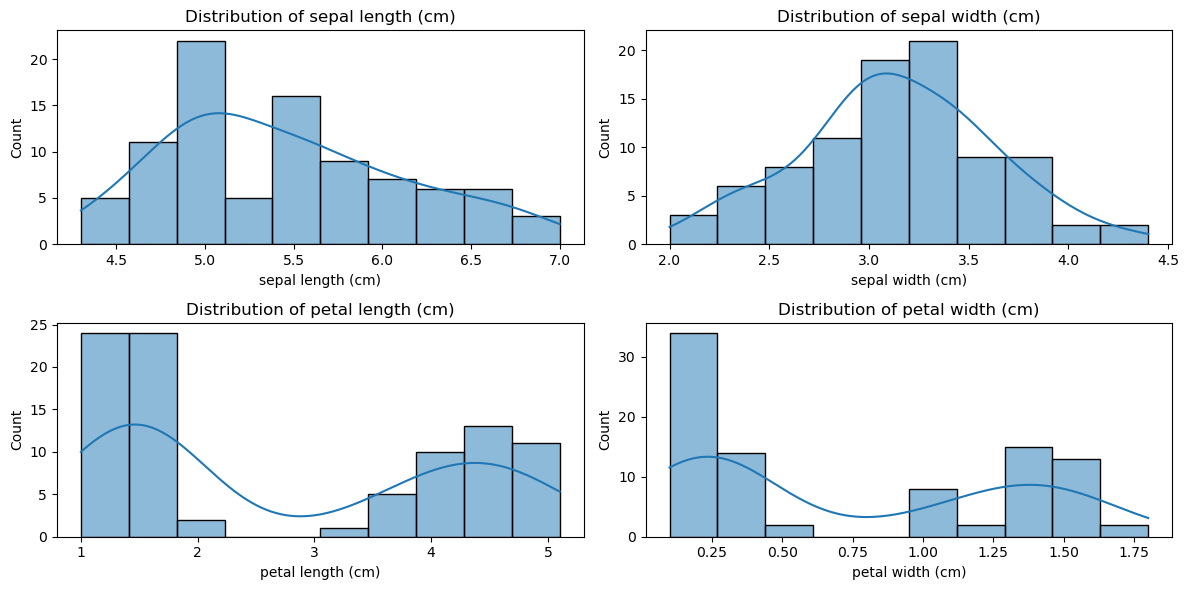

In [62]:
# Plotting distributions of features before scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train[feature], bins=10, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

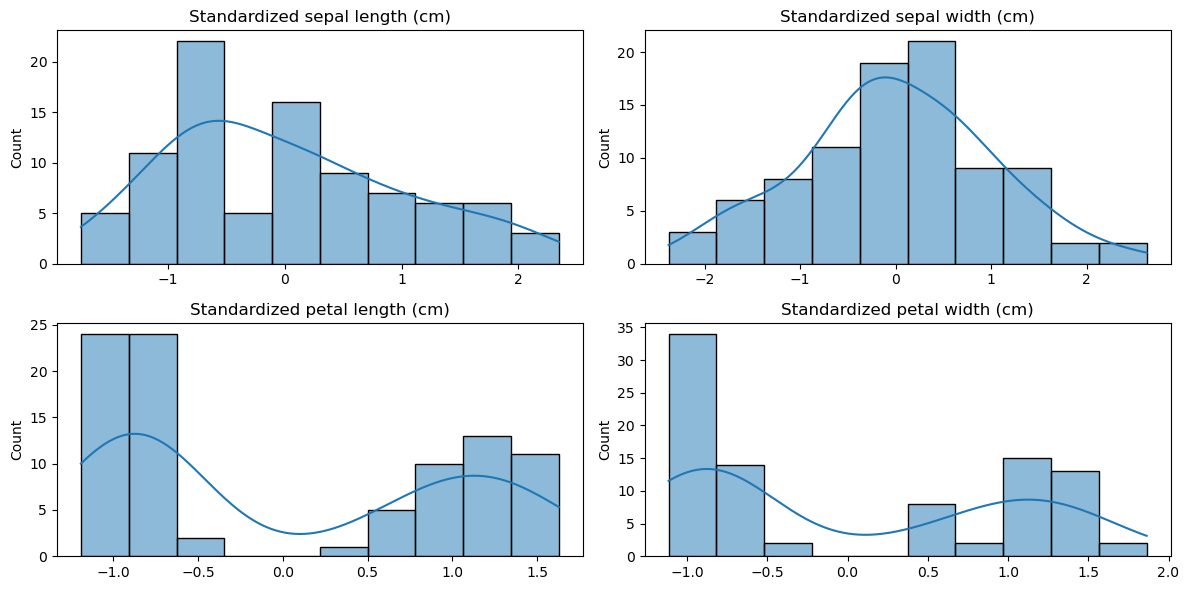

In [63]:
# Plotting features after standardization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train_standard[:, i-1], bins=10, kde=True)
    plt.title(f'Standardized {feature}')
plt.tight_layout()
plt.show()

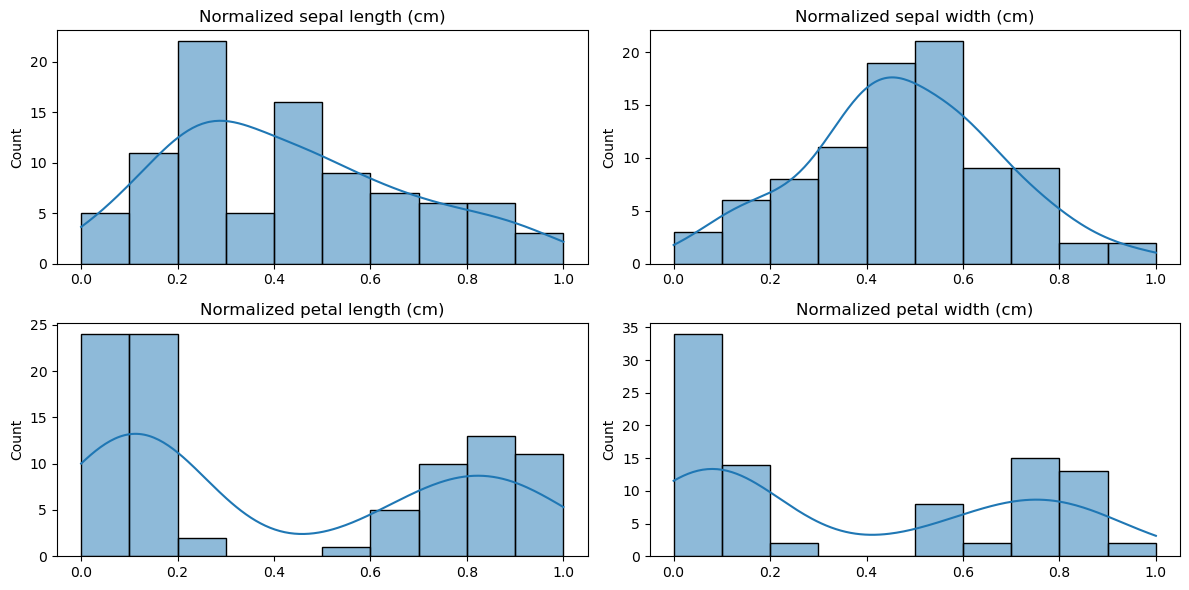

In [64]:
# Plotting features after normalization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train_minmax[:, i-1], bins=10, kde=True)
    plt.title(f'Normalized {feature}')
plt.tight_layout()
plt.show()

### Handling Categorical Data
Converting categorical variables into a format suitable for machine learning algorithms.

We will be using a toy example since iris dataset does not have categorical variables.

In [65]:
# One-Hot Encoding
# Creating a small categorical dataset and applying one-hot encoding to convert categorical variables into binary columns.
cat_data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'XL', 'M']
})

print("Original dataset")
print(cat_data)

# One-hot encoding using sklearn
encoder = OneHotEncoder()

# Fit and transform the data
cat_data_encoded = encoder.fit_transform(cat_data).toarray()

print("Encoded dataset")
print(cat_data_encoded)

Original dataset
   Color Size
0    Red    S
1  Green    M
2   Blue    L
3  Green   XL
4    Red    M
Encoded dataset
[[0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0.]]


One can also use pandas for this

In [66]:
# one hot encoding with pandas
cat_data_encoded = pd.get_dummies(cat_data)

print("Encoded dataset")
print(cat_data_encoded)

Encoded dataset
   Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S  Size_XL
0       False        False       True   False   False    True    False
1       False         True      False   False    True   False    False
2        True        False      False    True   False   False    False
3       False         True      False   False   False   False     True
4       False        False       True   False    True   False    False


In [67]:
# label encoding
# Creating a small categorical dataset and applying label encoding to convert categorical variables into numerical ones.
cat_data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'XL', 'M']
})

print("Original dataset")
print(cat_data)

# Label encoding using sklearn
encoder = LabelEncoder()

# Fit and transform the data
cat_data_encoded = cat_data.apply(encoder.fit_transform)

print("Encoded dataset")
print(cat_data_encoded)

Original dataset
   Color Size
0    Red    S
1  Green    M
2   Blue    L
3  Green   XL
4    Red    M
Encoded dataset
   Color  Size
0      2     2
1      1     1
2      0     0
3      1     3
4      2     1


In [68]:
# label encoding with pandas
cat_data_encoded = cat_data.copy()

for col in cat_data.columns:
    cat_data_encoded[col] = cat_data[col].astype('category').cat.codes

print("Encoded dataset")
print(cat_data_encoded)

Encoded dataset
   Color  Size
0      2     2
1      1     1
2      0     0
3      1     3
4      2     1


## Feature Selection

### Filter Methods
Evaluate features based on statistical tests.

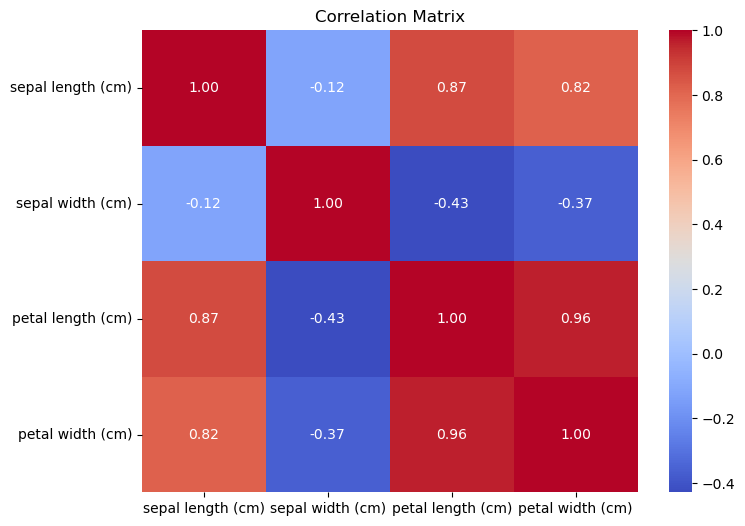

In [69]:
# Correlation
# Computing the correlation matrix to identify the relationships between features.
correlation_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [70]:
# Chi-Squared Test
# Applying the chi-squared test to select features based on their statistical relationship with the target variable.
chi2_selector = SelectKBest(chi2, k=2)

# Fit and transform the data
X_new = chi2_selector.fit_transform(X, y)

# print feature name, score, and whether it was selected or not
for i in range(len(data.feature_names)):
    print(f"Feature: {data.feature_names[i]}, Score: {chi2_selector.scores_[i]}, Selected: {chi2_selector.get_support()[i]}")

Feature: sepal length (cm), Score: 10.817820878494002, Selected: False
Feature: sepal width (cm), Score: 3.7107283035324965, Selected: False
Feature: petal length (cm), Score: 116.31261309207025, Selected: True
Feature: petal width (cm), Score: 67.04836020011118, Selected: True


### Wrapper Methods
Use a specific model to evaluate subsets of features.

In [71]:
# Recursive Feature Elimination (RFE)
model_rfe = LogReg()
rfe = RFE(estimator=model_rfe, n_features_to_select=2)
rfe.fit(X_train, y_train)

print("Selected features using RFE:\n", X.columns[rfe.support_])

Selected features using RFE:
 Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


## Putting Everything Together (Test time)

Now that we tested various processing techiques let's apply a full example combining everything and check the performance on the test set.

Experiment with different combinations.

In [72]:
# load the dataset
data = load_iris()

# split the dataset
X = pd.DataFrame(data.data, columns=data.feature_names)

# apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# create the splits
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# apply hyperparameter tuning using Grid Search with cross-validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

# create the model
log_reg = LogisticRegression(max_iter=200)

# create the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# fit the model
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best score from Grid Search:", grid_search.best_score_)

# evaluate the model on the validation set
y_valid_pred = grid_search.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy)

# evaluate the model on the test set
y_test_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)


Best parameters from Grid Search: {'C': 1}
Best score from Grid Search: 0.9333333333333333
Validation Accuracy: 1.0
Test Accuracy: 0.9666666666666667


## Unsupervised Learning

In [73]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Original dataset")
print("Input Features:", X.shape)
print("Target Features:", y.shape)

X

Original dataset
Input Features: (150, 4)
Target Features: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
# Standardize the data before applying unsupervised learning methods
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Dimensionality Reduction

Principal Components: [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


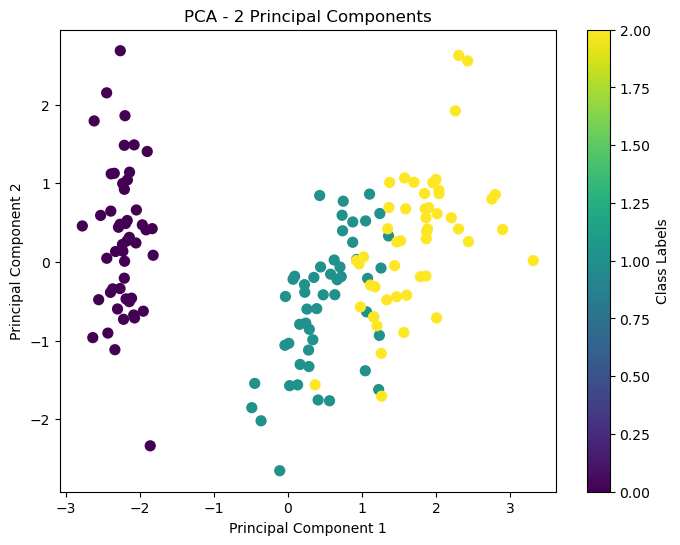

In [76]:
# Dimensionality Reduction Techniques

# Principal Component Analysis (PCA)
# PCA is a linear technique used for reducing the dimensionality of data by projecting it onto a set of orthogonal axes (principal components).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# print the feaurures being considered as the principal components
print("Principal Components:", pca.components_)

# Plot the reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("PCA - 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Labels")
plt.show()

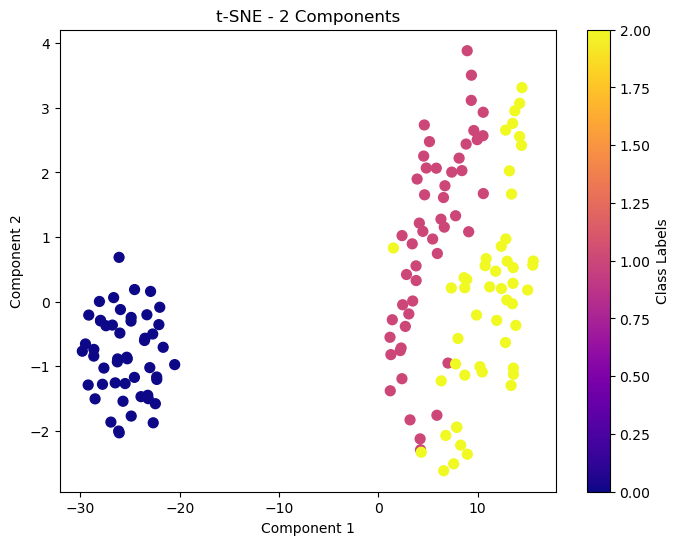

In [77]:
## t-SNE (t-distributed Stochastic Neighbor Embedding)
# t-SNE is a nonlinear technique that is particularly useful for visualizing high-dimensional data in lower dimensions (typically 2D).
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma', s=50)
plt.title("t-SNE - 2 Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Class Labels")
plt.show()

### Clustering Methods

c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


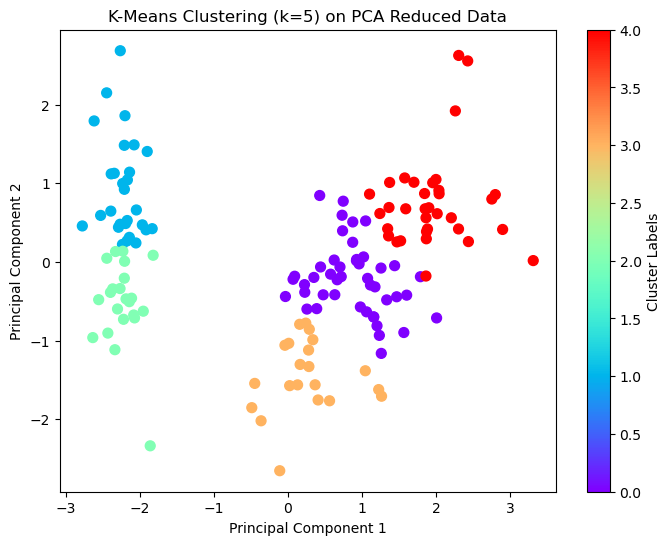

In [78]:
# Apply K-Means with a Selected Value of K
# Applying K-Means with a random number of clusters (for example, k=5)
random_k = 5
kmeans_random = KMeans(n_clusters=random_k, random_state=42)
X_kmeans_random = kmeans_random.fit_predict(X_scaled)

# Plot K-Means Clusters with Random K
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_kmeans_random, cmap='rainbow', s=50)
plt.title(f"K-Means Clustering (k={random_k}) on PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Labels")
plt.show()

We apply the elbow method to try to find an optimal K

c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

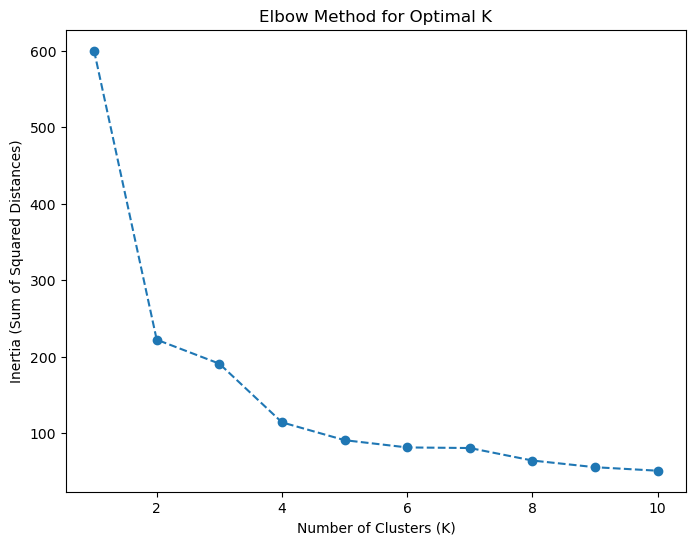

In [79]:
# Elbow Method for Finding "Optimal" K
# The elbow method helps in selecting the optimal number of clusters by plotting the sum of squared distances (inertia) for different values of k.
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

From the plot, the correct number of clusters is k=3 (for Iris dataset)

c:\ProgramData\Anaconda3\envs\nlp-cv-ir\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


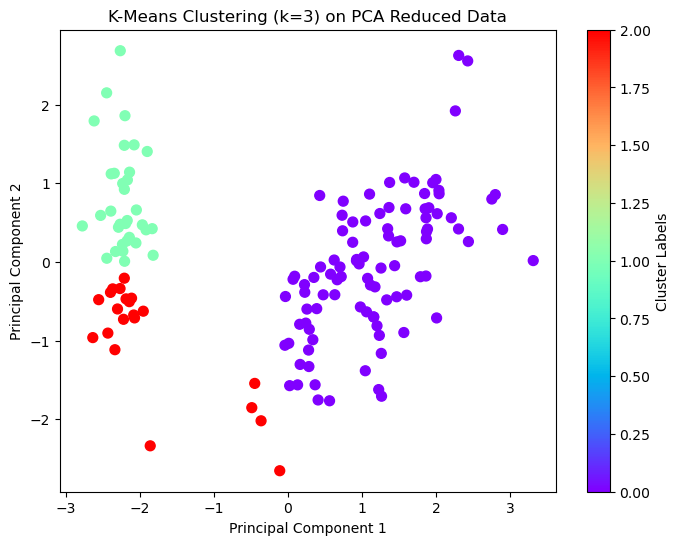

In [80]:
optimal_k = 3

# Apply K-Means with Optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
X_kmeans_optimal = kmeans_optimal.fit_predict(X_scaled)

# Plot K-Means Clusters with Optimal K
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_kmeans_optimal, cmap='rainbow', s=50)
plt.title(f"K-Means Clustering (k={optimal_k}) on PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Labels")
plt.show()


### Cluster Validation
Check the Silhouette Score

In [81]:
# Silhouette Score for Random K-Means
silhouette_avg_random = silhouette_score(X_scaled, X_kmeans_random)
print(f"Silhouette Score for K-Means (k={random_k}): {silhouette_avg_random:.4f}")


# Silhouette Score for Optimal K-Means
silhouette_avg_optimal = silhouette_score(X_scaled, X_kmeans_optimal)
print(f"Silhouette Score for K-Means (k={optimal_k}): {silhouette_avg_optimal:.4f}")

Silhouette Score for K-Means (k=5): 0.3450
Silhouette Score for K-Means (k=3): 0.4799


### Other Clustering Methods

#### DBSCAN

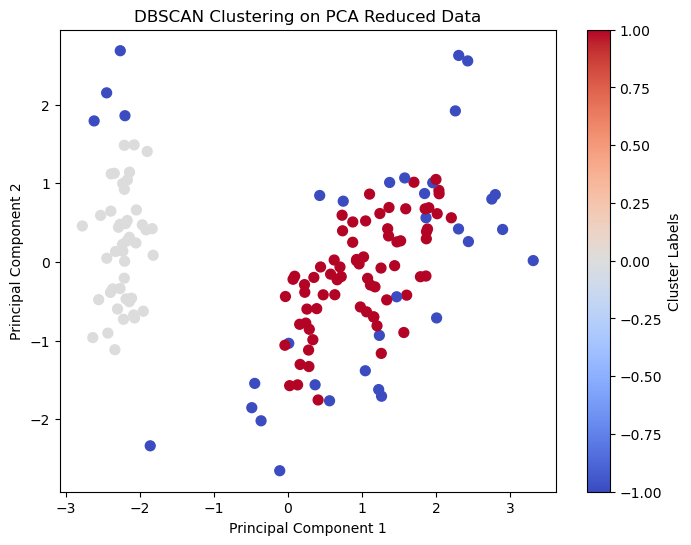

In [82]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
# DBSCAN is a density-based clustering method that groups points that are closely packed together, marking points in sparse regions as noise.

dbscan = DBSCAN(eps=0.5, min_samples=5)
X_dbscan = dbscan.fit_predict(X_scaled)

# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_dbscan, cmap='coolwarm', s=50)
plt.title("DBSCAN Clustering on PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Labels")
plt.show()

In [83]:
# Silhouette Score for DBSCAN
# Since some points might be labeled as noise (-1) do not calculate the silhouette score
if len(set(X_dbscan)) > 1:  # Ensuring that there is more than one cluster
    silhouette_avg_dbscan = silhouette_score(X_scaled, X_dbscan)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("DBSCAN resulted in only one cluster or too many noise points, no silhouette score calculated.")


Silhouette Score for DBSCAN: 0.3565


#### Hierarchical Clustering

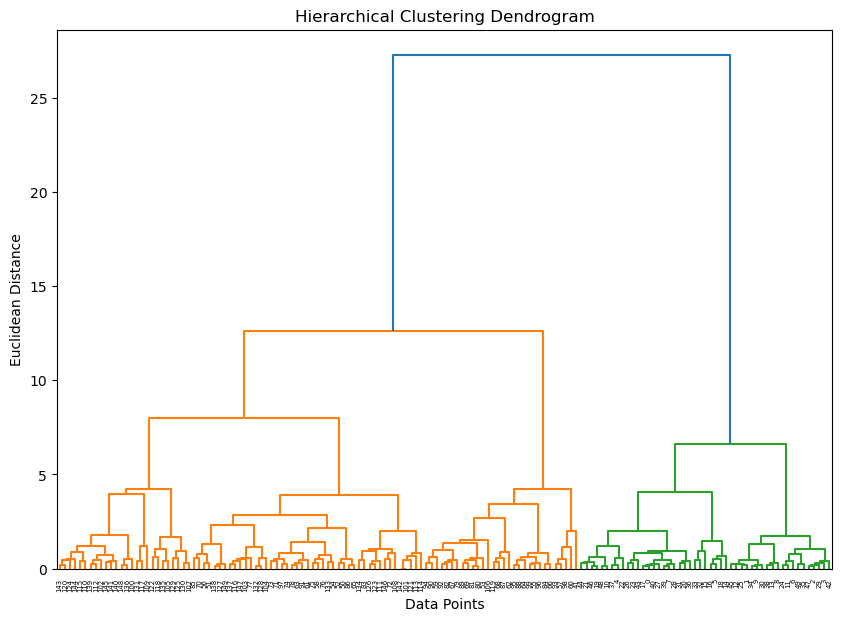

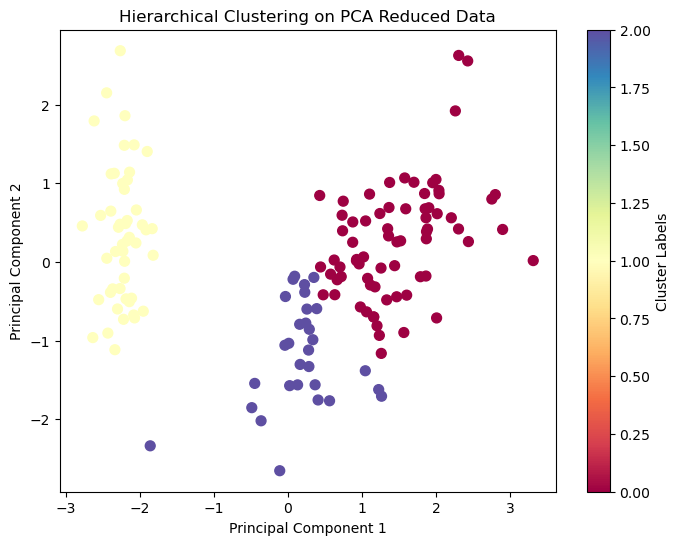

In [84]:
# Agglomerative Clustering
# Hierarchical clustering groups data points in a tree-like structure by successively merging or splitting clusters.

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
X_hierarchical = hierarchical.fit_predict(X_scaled)

# Plot Hierarchical Clustering Dendrogram (for visualization)
linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Plot the Hierarchical Clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_hierarchical, cmap='Spectral', s=50)
plt.title("Hierarchical Clustering on PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Labels")
plt.show()

In [85]:
# Silhouette Score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(X_scaled, X_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.4f}")

Silhouette Score for Hierarchical Clustering: 0.4467


## Case Study

Think about the case study you want to apply these data science tools to.

We are aiming for:
- Groups of 3 students (2 or individual is also possible depending on the case)
- Final presentation in the last course session (18th October)

Pick an interesting dataset:
- Take some time to choose your dataset
- From Kaggle or UCI
- Bring your own

### Data Requirements

- Between 500 to 100k samples
- Tabular file (csv)
- Only categorical and/or numerical features

Potential datasets (links on slides):
- Cost of Living Index by Country
- Red Wine Quality
- House Rent Prediction
- Stellar Classification
- Sleep Efficiency
- Healthcare Diabetes Dataset

### Case Study Requirements

One operation of each of the following:
- Dataset Descriptive Statistics
- Data Cleaning (e.g. checking for NaNs, column removal, etc.)
- Model Selection, Feature Engineering, and Normalization
- Plotting (frequency, correlation between feature pairs)
- Supervised Learning: 
- Training a linear classifier
- Evaluate its performance over multiple metrics

Let’s simulate a Data Science team discussion:

Bring your expertise and point of view!


### Presentation

We Invite all groups to present and discuss their use-case with the class:
- Show and discuss your notebook to the class
- 5 to 7 minutes per presentation
- Presentations on the 18th of October (next Friday).